# Local testing for Vertex Cover algorithms

Fix for NotImplementedError for notebook in Python3.8
https://stackoverflow.com/questions/58422817/jupyter-notebook-with-python-3-8-notimplementederror

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

## Generating graphs

In [30]:
# Generate classic small graphs
petersen = nx.petersen_graph()
tutte = nx.tutte_graph()
maze = nx.sedgewick_maze_graph()
tet = nx.tetrahedral_graph()

In [3]:
# Generate social networks
florentine = nx.generators.social.florentine_families_graph()

In [4]:
# Constructively generate classic graphs
K_5 = nx.complete_graph(5)
K_3_5 = nx.complete_bipartite_graph(3, 5)
barbell = nx.barbell_graph(10, 10)
lollipop = nx.lollipop_graph(10, 20)

In [5]:
# Generate stochastic graphs
er = nx.erdos_renyi_graph(100, 0.15)
ws = nx.watts_strogatz_graph(30, 3, 0.1)
ba = nx.barabasi_albert_graph(100, 5)
red = nx.random_lobster(100, 0.9, 0.9)

In [37]:
def info(graph):
    from networkx.classes.function import density
    from networkx.algorithms.cluster import average_clustering
    print(f"{graph.number_of_edges()},{graph.number_of_nodes()},{density(graph)},{average_clustering(graph)}")

NetworkX random graph generators worth testing with:
- Community
- Social Networks
- Random Graphs

Caveman(l k),
Relaxed Caveman(l k p),
Random Partition(s i o),
Erdos Renyi(n p),
Newman–Watts–Strogatz small-world(n k p),
Watts–Strogatz small-world(n k p),
Barabási–Albert(n m)
Power Law Cluter Graph(n m p),

## Drawing graphs

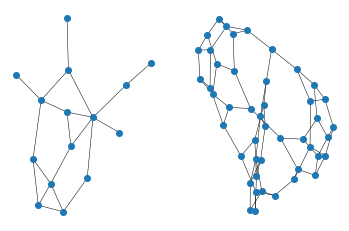

In [6]:
options = {
#     'node_color': 'black',
    'node_size': 50,
    'line_color': 'grey',
    'linewidths': 0,
    'width': 0.5,
}

plt.subplot(121)
nx.draw(florentine, **options)
plt.subplot(122)
nx.draw(tutte, **options)

## Testing VC

In [7]:
def print_vc(graph, vc):
    if vc:
        print(vc)
        print(f"Size: {len(vc)}")
        print(f"VC? : {is_vertex_cover(graph, vc)}")
    else:
        print("None")

### Validity

In [8]:
graph = florentine
k = 11

#### Kernelization

In [9]:
"""
vertex_cover_kernelization
"""

vc_k = vertex_cover_kernelization(graph, k)
print_vc(graph, vc_k)

{'Salviati', 'Guadagni', 'Medici', 'Peruzzi', 'Ridolfi', 'Castellani', 'Albizzi', 'Strozzi'}
Size: 8
VC? : True


#### Branching

In [10]:
"""
vertex_cover_branching_dfs_recursive
vertex_cover_branching_dfs_iterative
vertex_cover_branching_bfs
"""

vc_b_dfs_r = vertex_cover_branching_dfs_recursive(graph, k)
print_vc(graph, vc_b_dfs_r)

vc_b_dfs_i = vertex_cover_branching_dfs_iterative(graph, k)
print_vc(graph, vc_b_dfs_i)

vc_b_bfs = vertex_cover_branching_bfs(graph, k)
print_vc(graph, vc_b_bfs)

{'Salviati', 'Guadagni', 'Medici', 'Acciaiuoli', 'Ridolfi', 'Tornabuoni', 'Peruzzi', 'Bischeri', 'Castellani', 'Albizzi', 'Strozzi'}
Size: 11
VC? : True
{'Salviati', 'Guadagni', 'Medici', 'Acciaiuoli', 'Ridolfi', 'Tornabuoni', 'Peruzzi', 'Bischeri', 'Castellani', 'Albizzi', 'Strozzi'}
Size: 11
VC? : True
{'Salviati', 'Guadagni', 'Medici', 'Acciaiuoli', 'Ridolfi', 'Tornabuoni', 'Peruzzi', 'Bischeri', 'Castellani', 'Albizzi', 'Strozzi'}
Size: 11
VC? : True


### Runtime Analysis

#### Requirements

- Multiple graphs
- graphs must vary in size and density
- find minimum k by using a binary search from 0 up
- use process_time
- repeat each k value x times
- record times to csv
- log % completion using tqdm
- synthetic vs real life graphs


In [ ]:
for i in trange(3, desc='1st loop'):
    for j in tqdm(range(100), desc='2nd loop', leave=False):
        sleep(0.01)

In [43]:
import pandas as pd
graphs = pd.read_csv('graphs.csv')
graphs

,Name,|edges|,|nodes|,density,clustering coefficient,real/synthetic?
0,Petersen,15,10,0.333333,0.000000,synthetic
1,Tutte,69,46,0.066667,0.000000,synthetic
2,Florentine Families,20,15,0.190476,0.160000,real
3,Karate Club,78,34,0.139037,0.570638,real
4,Les Miserables,254,77,0.086808,0.573137,real


#### Testing

In [27]:
# imports
from time import perf_counter_ns
from tqdm.notebook import tqdm, trange
from vertex_cover import *
import networkx as nx
import pandas as pd

In [26]:
# data
graphs = [
    ("Petersen", nx.petersen_graph()),
    ("Florentine Families", nx.generators.social.florentine_families_graph()),
    ("Karate Club", nx.generators.social.karate_club_graph()),
    ("Tutte", nx.tutte_graph()),
    ("Les Miserables", nx.generators.social.les_miserables_graph()),
]

algorithms = [
    ("Branching DFS Recursive", vertex_cover_branching_dfs_recursive),
    ("Branching DFS Iterative", vertex_cover_branching_dfs_iterative),
    ("Branching BFS", vertex_cover_branching_bfs),
    ("Kernelization", vertex_cover_kernelization),
#     ("Streaming Kernelization", vertex_cover_kernelization_stream),
#     ("Streaming Branching", vertex_cover_branching_stream),
]

In [18]:
# functions
def timeit(function, graph, k):
    start = perf_counter_ns()
    res = function(graph, k)
    time_pc = perf_counter_ns() - start
    return res, time_pc

def gen_result(alg_name, graph_name, k, result, time_pc):
    return {
        "Algorithm": alg_name,
        "Graph name": graph_name,
        "k": k,
        "Found result": result != None,
        "Time (perf)": time_pc,
    }

In [25]:
# script
results = []

for i in trange(len(graphs), desc="Testing"):
    graph_name, graph = graphs[i]
    graph_nodes_len = len(graph.nodes)
    for j in trange(len(algorithms), desc=graph_name, leave=False):
        alg_name, func = algorithms[j]
        for _ in trange(100, desc=alg_name, leave=False):
            for k in range(1, graph_nodes_len + 1):
                result, time_pc = timeit(func, graph, k)
                results.append(gen_result(alg_name, graph_name, k, result, time_pc))

KeyboardInterrupt: 

In [22]:
# df = pd.DataFrame(results)
# df.head()
# df.to_csv('results.csv')
df = pd.DataFrame(results)
df.head()
df.to_csv('results.csv')